# Segmentation Examples

A file which provides examples for testing and optimizing the segmentation process

In [2]:
from immas import segmentation, preprocessing, MammogramImage
from immas.basic_functions import show_image_plt
import numpy, cv2, os
from immas.io import read_dataset

In [2]:
help(segmentation.multithresholding)
help(segmentation.mean_shift)

Help on function multithresholding in module immas.segmentation:

multithresholding(img)
    Performs multi-thresholding to aid segmentation.
    
    Args:
    img: GRAYSCALE image file.
    
    Returns:
    thresholded_img (uint8): thresholded image file.

Help on function mean_shift in module immas.segmentation:

mean_shift(img, sp, sr)
    Performs mean shifting to aid segmentation.
    
    Args:
    img: image file.
    sp (int): The spatial window radius.
    sr (int): The color window radius.
    
    Returns:
    shifted_img (uint8, gray): shifted image file.



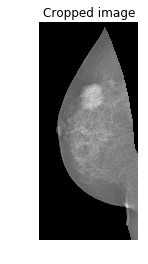

In [3]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)
show_image_plt(mm.image_data,'Cropped image')

## Implement Mean Shift

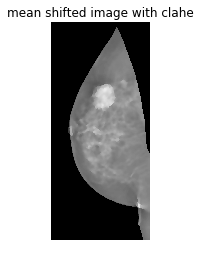

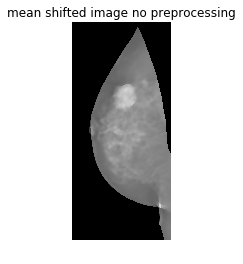

In [4]:
clahe = preprocessing.clahe(mm.image_data)
shifted_clahe = segmentation.mean_shift(clahe,20,30)
shifted = segmentation.mean_shift(mm.image_data,20,30)
show_image_plt(shifted_clahe,"mean shifted image with clahe")
show_image_plt(shifted,"mean shifted image no preprocessing")

## Implement multithresholding

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars


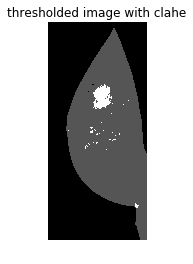

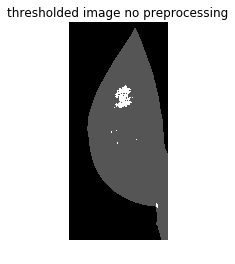

In [5]:
thresh_clahe = segmentation.multithresholding(clahe)
show_image_plt(thresh_clahe, 'thresholded image with clahe')
thresh = segmentation.multithresholding(mm.image_data)
show_image_plt(thresh, 'thresholded image no preprocessing')

## Turn Thresholded Image to Binary

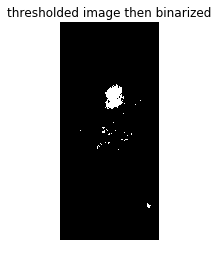

In [6]:
binary = segmentation.thresh_to_binary(thresh_clahe)
show_image_plt(binary, 'thresholded image then binarized')

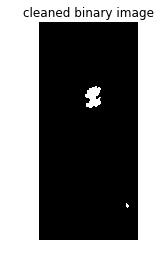

In [7]:
segmented_images = preprocessing.open(binary,(20,20))
show_image_plt(segmented_images, 'cleaned binary image')

# Define some testing functions for preprocessing and segmentation methods

In [3]:
def testPreProcessing (img):
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img)
    img = preprocessing.morphoEnhancement(img,2)
    img = preprocessing.waveletTransform(img)
    return img

def testPreProcessing2 (img):
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    img = preprocessing.clahe(img, 2, 8)
    #img = preprocessing.morphoEnhancement(img,2)
    #img = preprocessing.waveletTransform(img)#.astype('uint16')
    return img

# Defines function to apply segmentation techniques.
# This can be used to try different parameters for the segmentation functions.
# Also can be used to try those functions in different orders.

def testSegmentation(img):
    #img = segmentation.mean_shift(img,20,30)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,(20,20))
    return img

def testSegmentation2(img):
    img = segmentation.mean_shift(img,20,30)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,(20,20))
    return img

## Use Marcio's preprocessed images to test the jaccard index function

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 6, number of images for testing is 18


/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


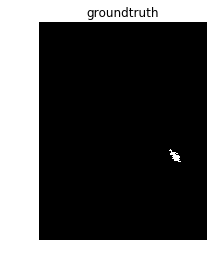

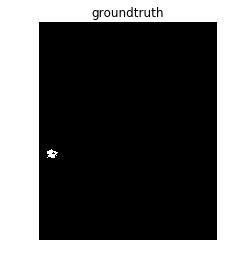

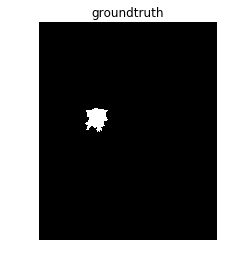

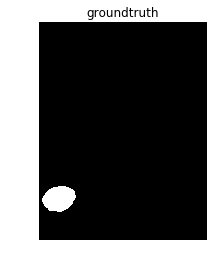

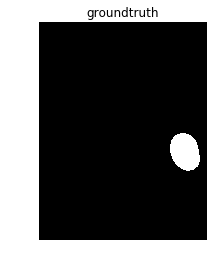

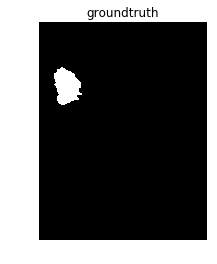

Average jaccard index for training set is 0.9398618926585202
Average jaccard index for training set is 0.849710815982123


In [4]:
# Trying with marcio's preprocessing
data_set = read_dataset(image_folder="../dataset/masses_examples_preprocessed",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
img = data_set["train"]
for m in img:
    m.read_data()
    m.image_data = testSegmentation(m.image_data)
    segmented_image = (m.uncropped_image).astype('uint8')
    av_jaccard = av_jaccard + segmentation.jaccard_index(segmented_image,m.image_ground_truth)
    show_image_plt(m.image_ground_truth, "groundtruth")
    
print("Average jaccard index for training set is {}".format(av_jaccard/len(data_set["train"])))

av_jaccard = 0
img = data_set["test"]
for m in img:
    m.read_data()
    m.image_data = testSegmentation(m.image_data)
    segmented_image = (m.uncropped_image).astype('uint8')
    av_jaccard = av_jaccard + segmentation.jaccard_index(segmented_image,m.image_ground_truth)
    
print("Average jaccard index for training set is {}".format(av_jaccard/len(data_set["test"])))

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 6, number of images for testing is 18


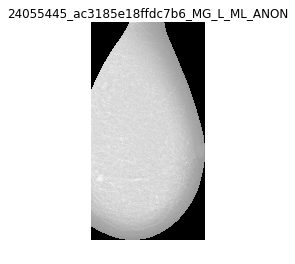

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars


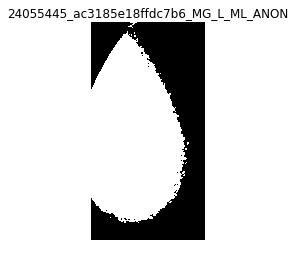

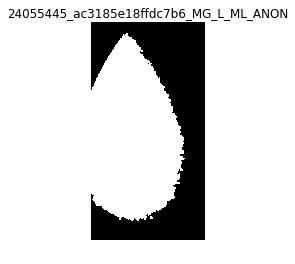

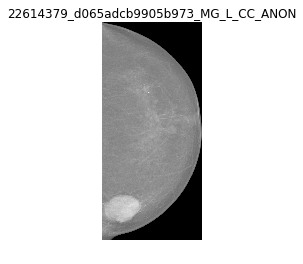

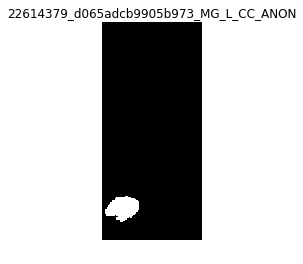

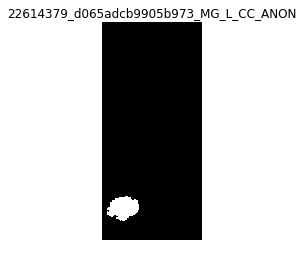

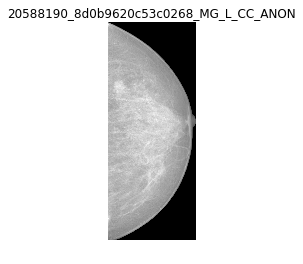

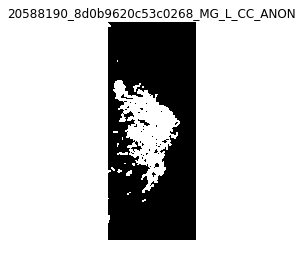

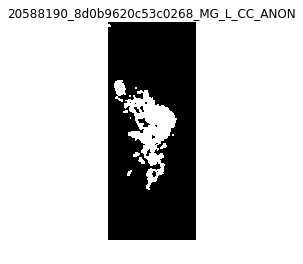

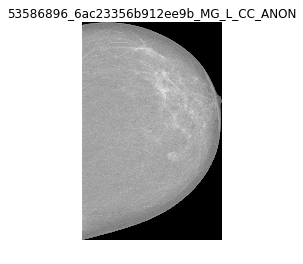

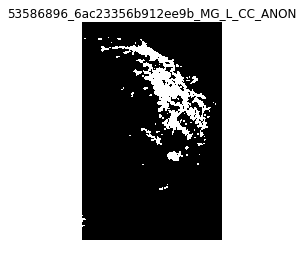

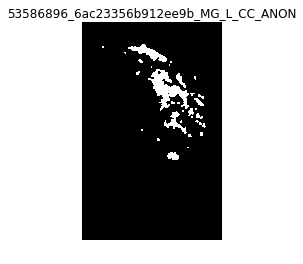

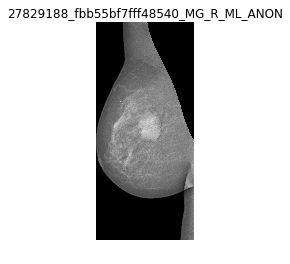

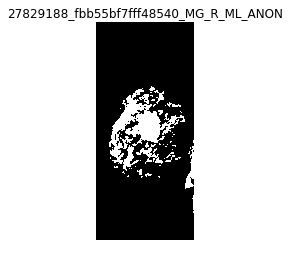

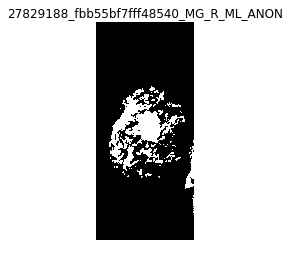

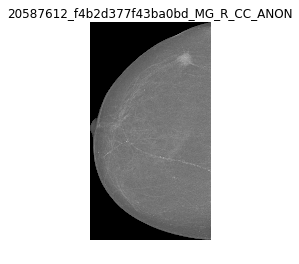

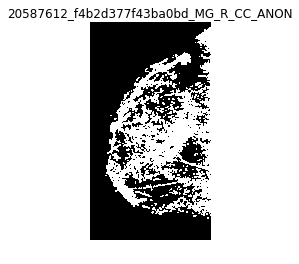

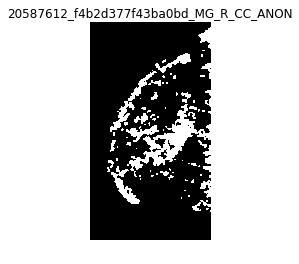

In [15]:
#Trying with preprocessing 1 (morpho + wavelet)

data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

img = data_set["train"]
for m in img:
    m.read_data()
    show_image_plt(m.image_data,"{}".format(m.file_name))
    
    m.image_data1 = testPreProcessing(m.image_data)
    
    #segment using both methods
    m.image_data1 = testSegmentation(m.image_data1)
    m.image_data2 = testSegmentation2(m.image_data1)
    
    #show both results
    show_image_plt(m.image_data1,"{}".format(m.file_name))
    show_image_plt(m.image_data2,"{}".format(m.file_name))
     

In [28]:
# Trying with preprocessing 2 
data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks", train_set_fraction=1)

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
av_jaccard2 = 0
img = data_set["train"]
count = 0
for m in img:
    m.read_data()
   
    m.image_data = testPreProcessing(m.image_data)
    SegA = testSegmentation(m.image_data)

    SegB = testSegmentation2(m.image_data)
    
    if (SegA.shape == (m.cropped_ground_truth).shape):
        count += 1
        av_jaccard = av_jaccard + segmentation.jaccard_index(SegA,  m.cropped_ground_truth)
        print(av_jaccard)
        av_jaccard2 = av_jaccard2 + segmentation.jaccard_index(SegB,  m.cropped_ground_truth)
        print(av_jaccard2)
        
print("Average jaccard index for training set (Segmentaion1)is {}".format(av_jaccard/count))
print("Average jaccard index for training set (Segmentaion2)is {}".format(av_jaccard2/count))

#img = data_set["test"]
#for m in img:
#    m.read_data()
#    m.image_data = testPreProcessing(m.image_data)
#    cv2.imwrite(os.path.join(savepath, m.file_name) + '.tif', m.uncropped_image)
    

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 24, number of images for testing is 0


C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


0.980255855901328
0.799852652259332
1.9155242026080033
1.6038070758518252
2.8349197105630557
2.429329558435739
3.7863289000639444
3.2423684439030405
4.735050143872736
4.141351457487894
5.537355475598083
5.08898340248997
6.388288677955647
5.933777115653035
7.370351975021461
5.933777115653035
8.274737309313338
6.837802996314429
9.192645462940652
7.75022637429093
10.128889001137091
8.680438895830276
Average jaccard index for training set (Segmentaion1)is 0.9208080910124629
Average jaccard index for training set (Segmentaion2)is 0.7891308087118433


In [29]:
count


11